<a href="https://colab.research.google.com/github/pjcroxas/Talent-Retention-in-Railway-Workforce/blob/main/Comprehensive_Data_Analysis_Railway_Workforce_Retention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, math
import matplotlib.ticker as mtick
from matplotlib import style

In [2]:
dir = "/content/drive/My Drive/Data Science Portfolio/2024/Talent Retention"

In [3]:
dir = "/content/drive/My Drive/Data Science Portfolio/2024/Talent Retention"
retention_df = pd.read_excel(dir+"/talent-retention-dataset.xlsx")
retention_df.head()

,Age,Sex,HighestEducationalAttainment,YearsofService,Occupation,Organization,NatureofEmployment,JF1,JF2,JL1,...,RM11,ITL1,ITS1,ITS2,ITS3,ITS4,ITL2,ITS5,ITS6,ITL3
0,36-40,Male,Bachelor's Degree,11-15 Years,Government Employee,Light Rail Transit Authority (LRTA),Permanent,3,4,2,...,3,3,3,3,3,3,3,3,3,3
1,46-50,Male,Bachelor's Degree,16-20 Years,Tranport operations Supervisor B,Light Rail Transit Authority (LRTA),Contractual,4,5,5,...,2,3,4,4,4,3,3,5,5,3
2,36-40,Male,Bachelor's Degree,11-15 Years,Transport Operations Supervisor B,Light Rail Transit Authority (LRTA),Contractual,4,5,3,...,4,4,5,5,5,3,3,5,5,4
3,46-50,Male,Bachelor's Degree,16-20 Years,Transport Operations Supervisor B,Light Rail Transit Authority (LRTA),Contractual,5,4,5,...,5,3,4,3,4,3,3,5,5,3
4,26-30,Male,Bachelor's Degree,6-10 Years,Train Driver A,Light Rail Transit Authority (LRTA),Contractual,5,5,4,...,5,3,5,5,5,5,3,5,5,3


**Job Embeddedness**

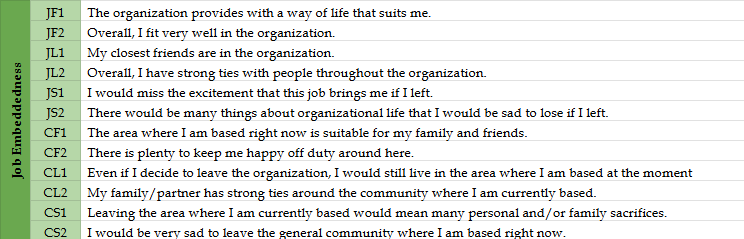

**Talent Management**

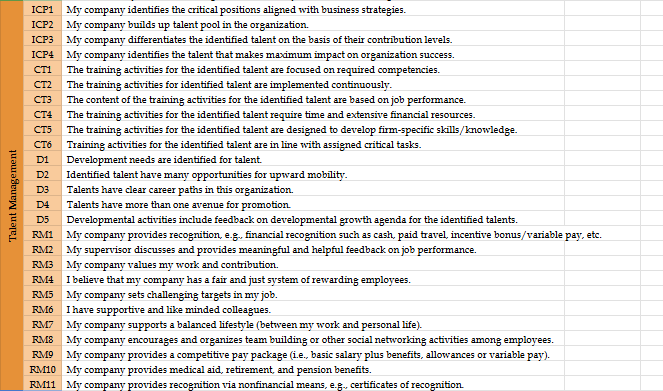

**Employee Retention**

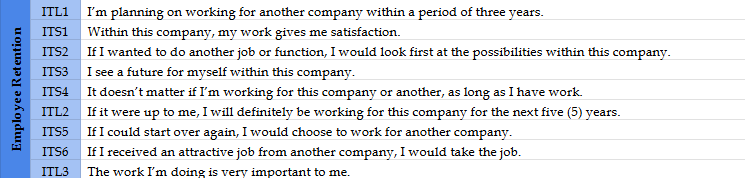

## Univariate Analysis

In [36]:
retention_df.columns

Index(['Age', 'Sex', 'HighestEducationalAttainment', 'YearsofService',
       'Occupation', 'Organization', 'NatureofEmployment', 'JF1', 'JF2', 'JL1',
       'JL2', 'JS1', 'JS2', 'CF1', 'CF2', 'CL1', 'CL2', 'CS1', 'CS2', 'ICP1',
       'ICP2', 'ICP3', 'ICP4', 'CT1', 'CT2', 'CT3', 'CT4', 'CT5', 'CT6', 'D1',
       'D2', 'D3', 'D4', 'D5', 'RM1', 'RM2', 'RM3', 'RM4', 'RM5', 'RM6', 'RM7',
       'RM8', 'RM9', 'RM10', 'RM11', 'ITL1', 'ITS1', 'ITS2', 'ITS3', 'ITS4',
       'ITL2', 'ITS5', 'ITS6', 'ITL3'],
      dtype='object')

In [67]:
style.use("ggplot")
def plot_univariate(feature, plot_type, angle, data=retention_df):
  count = data[feature].value_counts().sort_values()

  if plot_type == "pie":
    ax = count.plot(kind=plot_type, autopct='%1.1f%%', startangle=90, ylabel="", figsize=(6,6))

  else:
    ax = count.plot(kind=plot_type)
    xlabels = ax.get_xticklabels()
    sum = data[feature].value_counts().sum()
    for i, v in enumerate(count):
      ax.text(i, v, f"{v/sum:.1%}", ha="center", fontsize=10)  # 1% format
      ax.set_xticklabels(xlabels, rotation=angle, ha='right', rotation_mode='anchor')

Text(0.5, 0, 'Age Range')

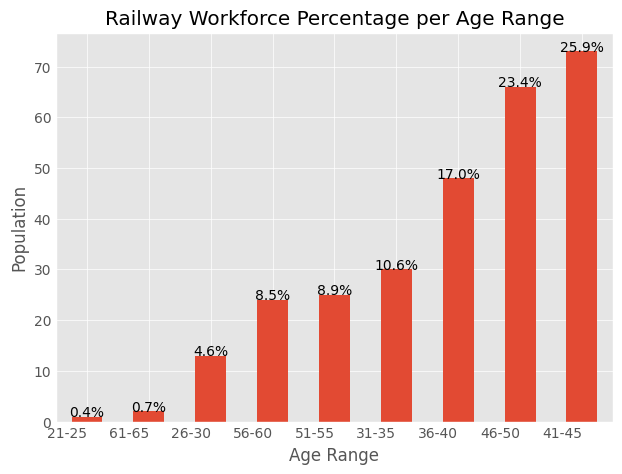

In [73]:
plot_univariate("Age", "bar", 0)
plt.title("Railway Workforce Percentage per Age Range")
plt.ylabel("Population")
plt.xlabel("Age Range")

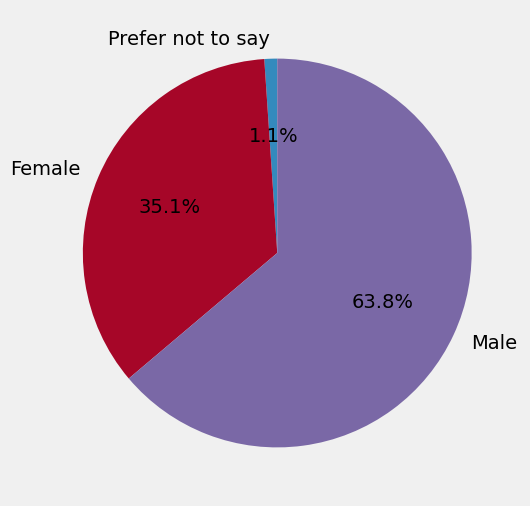

In [51]:
plot_univariate("Sex", "pie")

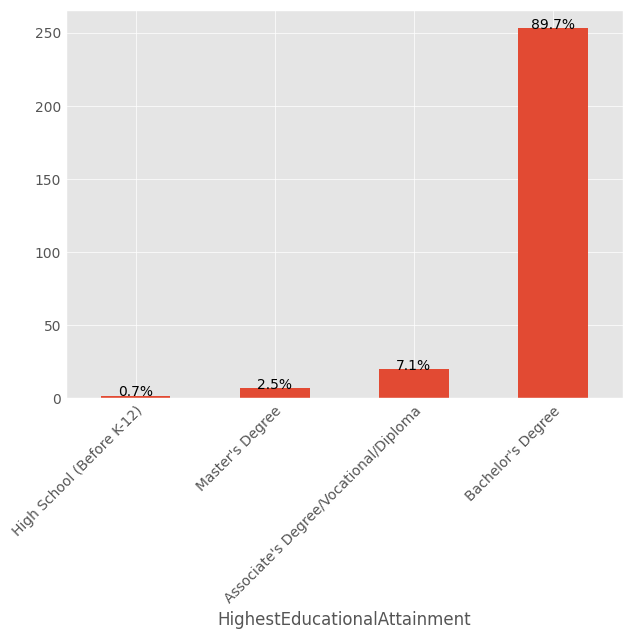

In [75]:
plot_univariate("HighestEducationalAttainment", "bar", 45)

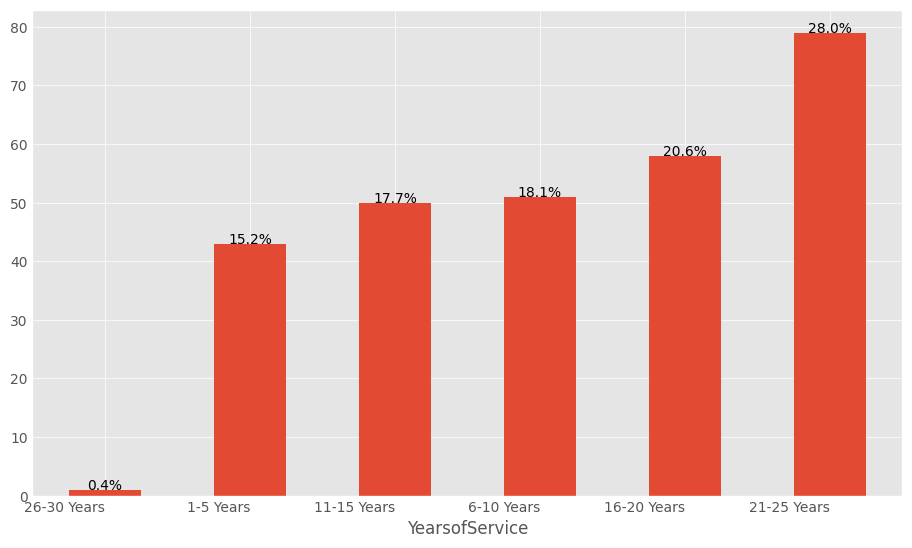

In [79]:
# retention_df["YearsofService"].value_counts().sum()
plt.figure(figsize=(10,6))
plot_univariate("YearsofService", "bar", 0)

In [56]:
retention_df.columns

Index(['Age', 'Sex', 'HighestEducationalAttainment', 'YearsofService',
       'Occupation', 'Organization', 'NatureofEmployment', 'JF1', 'JF2', 'JL1',
       'JL2', 'JS1', 'JS2', 'CF1', 'CF2', 'CL1', 'CL2', 'CS1', 'CS2', 'ICP1',
       'ICP2', 'ICP3', 'ICP4', 'CT1', 'CT2', 'CT3', 'CT4', 'CT5', 'CT6', 'D1',
       'D2', 'D3', 'D4', 'D5', 'RM1', 'RM2', 'RM3', 'RM4', 'RM5', 'RM6', 'RM7',
       'RM8', 'RM9', 'RM10', 'RM11', 'ITL1', 'ITS1', 'ITS2', 'ITS3', 'ITS4',
       'ITL2', 'ITS5', 'ITS6', 'ITL3'],
      dtype='object')

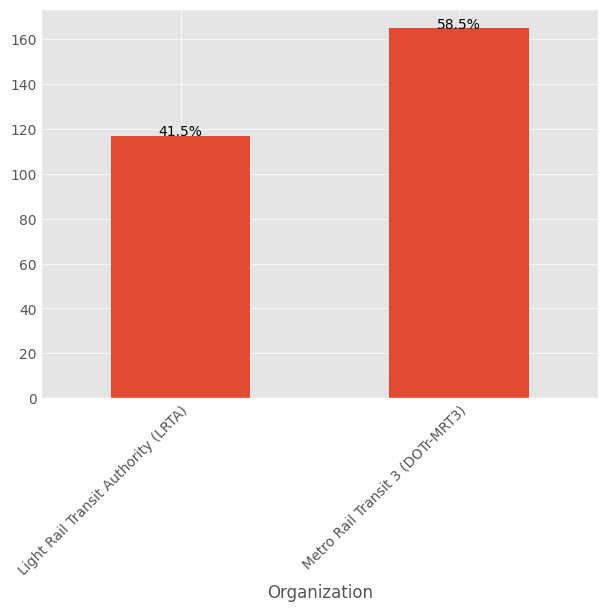

In [80]:
plot_univariate("Organization", "bar", 45)

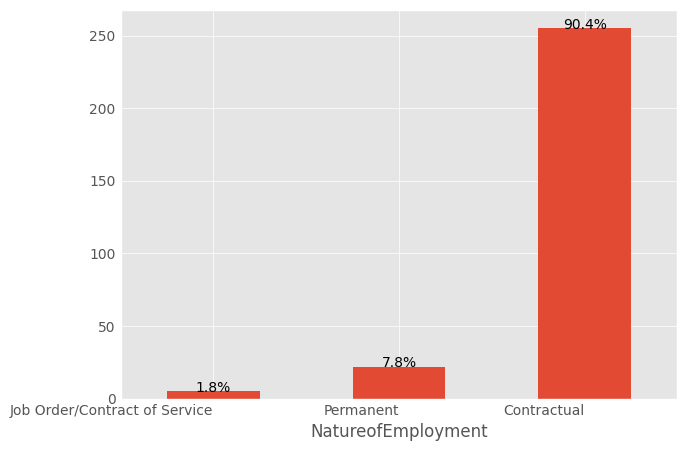

In [83]:
plot_univariate("NatureofEmployment", "bar", angle=0)

#**Bivariate Analysis**

### **Gender Distribution**

In [95]:
retention_df.columns

Index(['Age', 'Sex', 'HighestEducationalAttainment', 'YearsofService',
       'Occupation', 'Organization', 'NatureofEmployment', 'JF1', 'JF2', 'JL1',
       'JL2', 'JS1', 'JS2', 'CF1', 'CF2', 'CL1', 'CL2', 'CS1', 'CS2', 'ICP1',
       'ICP2', 'ICP3', 'ICP4', 'CT1', 'CT2', 'CT3', 'CT4', 'CT5', 'CT6', 'D1',
       'D2', 'D3', 'D4', 'D5', 'RM1', 'RM2', 'RM3', 'RM4', 'RM5', 'RM6', 'RM7',
       'RM8', 'RM9', 'RM10', 'RM11', 'ITL1', 'ITS1', 'ITS2', 'ITS3', 'ITS4',
       'ITL2', 'ITS5', 'ITS6', 'ITL3'],
      dtype='object')

In [93]:
def plot_sex_distrib(feature, data=retention_df):
  gender_employment_nature = retention_df.groupby(["Sex", feature]).size().reset_index(name="Count")
  total_count = gender_employment_nature["Count"].sum()
  gender_employment_nature["Percentage"] = (gender_employment_nature["Count"] / total_count) * 100
  fig, ax = plt.subplots(figsize=(8, 6))
  sns.barplot(data=gender_employment_nature, x=feature, y="Count", hue="Sex", ax=ax)

  # place percentage per plot
  for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height/total_count:.1%}",  # Convert to percentage format
                (p.get_x() + p.get_width() / 2., height),  # Positioning
                ha='center', va='bottom', fontsize=10, color='black')

Text(0, 0.5, 'Population')

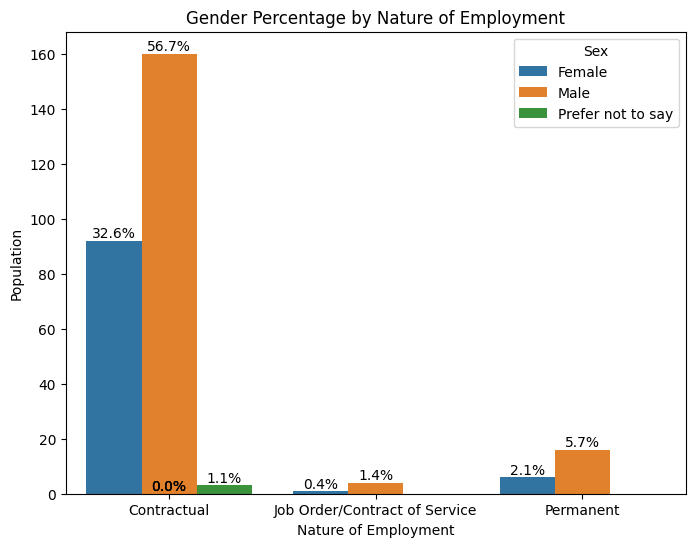

In [102]:
plot_sex_distrib("NatureofEmployment")
plt.title("Gender Percentage by Nature of Employment")
plt.xlabel("Nature of Employment")
plt.ylabel("Population")

Text(0, 0.5, 'Population')

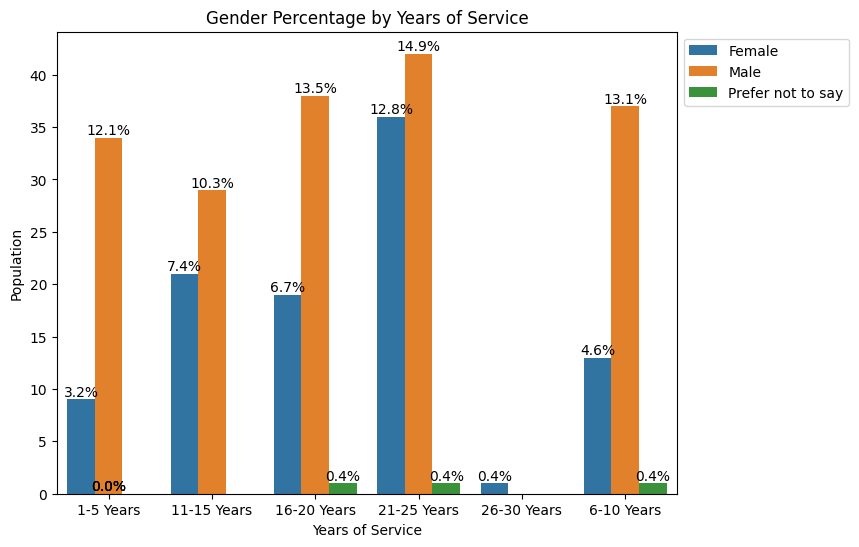

In [100]:
plot_sex_distrib("YearsofService")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Gender Percentage by Years of Service")
plt.xlabel("Years of Service")
plt.ylabel("Population")

In [101]:
retention_df.columns

Index(['Age', 'Sex', 'HighestEducationalAttainment', 'YearsofService',
       'Occupation', 'Organization', 'NatureofEmployment', 'JF1', 'JF2', 'JL1',
       'JL2', 'JS1', 'JS2', 'CF1', 'CF2', 'CL1', 'CL2', 'CS1', 'CS2', 'ICP1',
       'ICP2', 'ICP3', 'ICP4', 'CT1', 'CT2', 'CT3', 'CT4', 'CT5', 'CT6', 'D1',
       'D2', 'D3', 'D4', 'D5', 'RM1', 'RM2', 'RM3', 'RM4', 'RM5', 'RM6', 'RM7',
       'RM8', 'RM9', 'RM10', 'RM11', 'ITL1', 'ITS1', 'ITS2', 'ITS3', 'ITS4',
       'ITL2', 'ITS5', 'ITS6', 'ITL3'],
      dtype='object')

In [127]:
def classify_job_level(position):

    if isinstance(position, str):
      position = position.lower()  # Convert to lowercase for case-insensitive matching
      if "supervisor" in position or " a" in position:
          return "Managerial"
      elif "senior" in position or "iii" in position or "3" in position or "stdo" in position or "b" in position:
          return "Mid-Managerial"
      elif "c" in position:
          return "Subordinate"
      else:
          return "Subordinate"
    else:
      return "Unknown"

retention_df["Job Level"] = retention_df["Occupation"].apply(classify_job_level)

In [135]:
retention_df[["Occupation", "Job Level"]].sample(3)

,Occupation,Job Level
195,Ticket Seller III,Mid-Managerial
176,STDO,Mid-Managerial
47,Safety Specialist,Subordinate


Text(0, 0.5, 'Population')

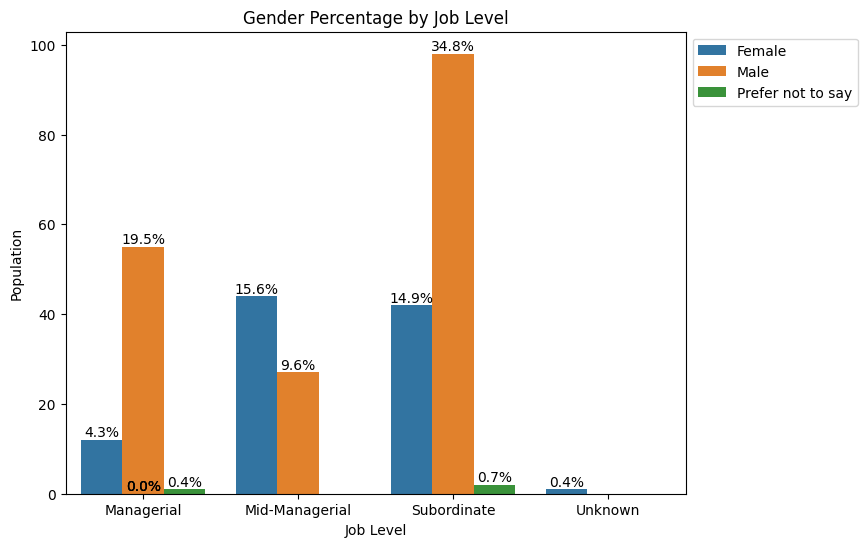

In [136]:
plot_sex_distrib("Job Level")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Gender Percentage by Job Level")
plt.xlabel("Job Level")
plt.ylabel("Population")

Text(0, 0.5, 'Population')

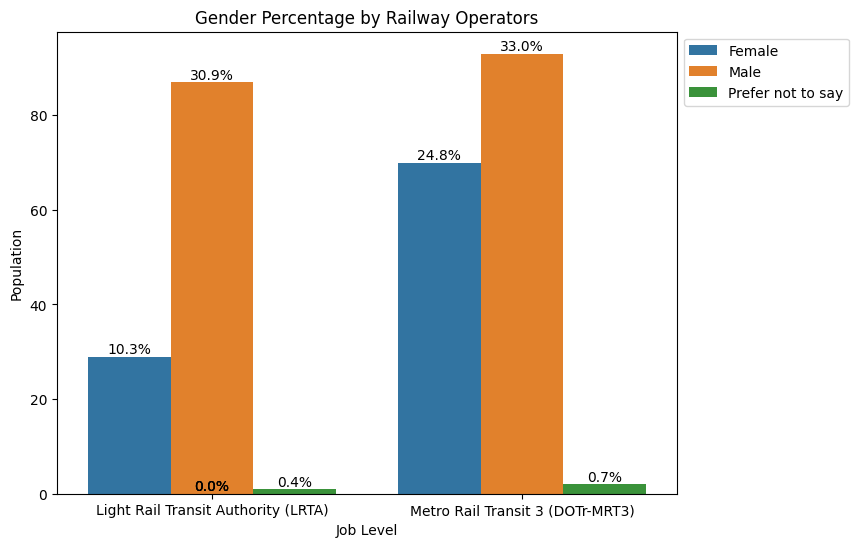

In [137]:
plot_sex_distrib("Organization")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Gender Percentage by Railway Operators")
plt.xlabel("Job Level")
plt.ylabel("Population")

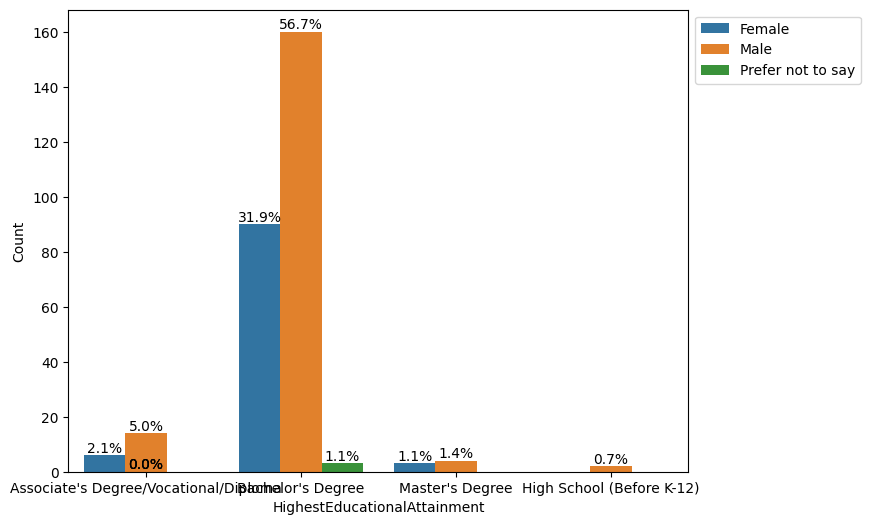

In [150]:
plot_sex_distrib("HighestEducationalAttainment")
# plt.figure(figsize=(20, 8))
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

### **Education**

In [142]:
def plot_educ_distrib(feature, data=retention_df):
  gender_employment_nature = retention_df.groupby(["HighestEducationalAttainment", feature]).size().reset_index(name="Count")
  total_count = gender_employment_nature["Count"].sum()
  gender_employment_nature["Percentage"] = (gender_employment_nature["Count"] / total_count) * 100
  fig, ax = plt.subplots(figsize=(8, 6))
  sns.barplot(data=gender_employment_nature, x=feature, y="Count", hue="HighestEducationalAttainment", ax=ax)

  # place percentage per plot
  for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height/total_count:.1%}",  # Convert to percentage format
                (p.get_x() + p.get_width() / 2., height),  # Positioning
                ha='center', va='bottom', fontsize=10, color='black')

In [143]:
retention_df.columns

Index(['Age', 'Sex', 'HighestEducationalAttainment', 'YearsofService',
       'Occupation', 'Organization', 'NatureofEmployment', 'JF1', 'JF2', 'JL1',
       'JL2', 'JS1', 'JS2', 'CF1', 'CF2', 'CL1', 'CL2', 'CS1', 'CS2', 'ICP1',
       'ICP2', 'ICP3', 'ICP4', 'CT1', 'CT2', 'CT3', 'CT4', 'CT5', 'CT6', 'D1',
       'D2', 'D3', 'D4', 'D5', 'RM1', 'RM2', 'RM3', 'RM4', 'RM5', 'RM6', 'RM7',
       'RM8', 'RM9', 'RM10', 'RM11', 'ITL1', 'ITS1', 'ITS2', 'ITS3', 'ITS4',
       'ITL2', 'ITS5', 'ITS6', 'ITL3', 'Job Level'],
      dtype='object')

**Education vs Years of Service**

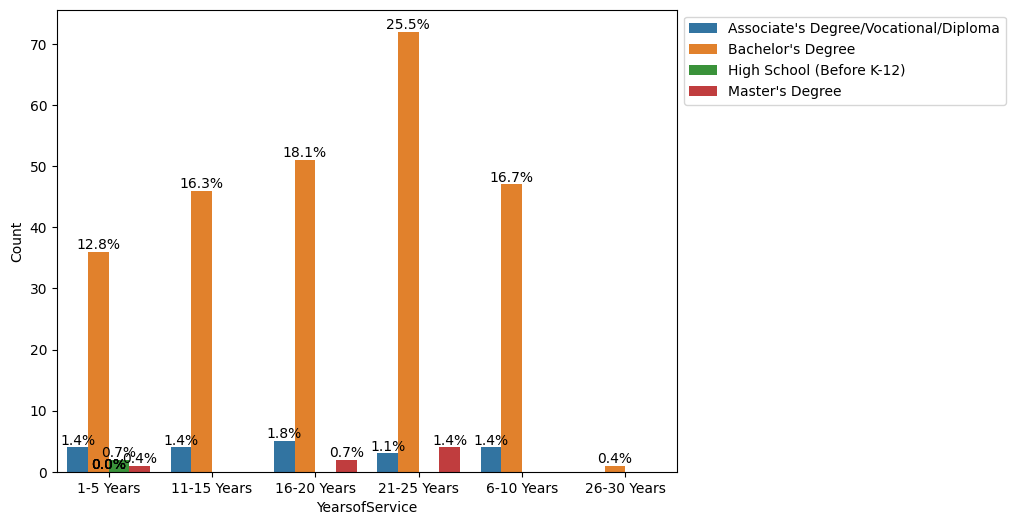

In [152]:
plot_educ_distrib("YearsofService")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

**Education vs Job Level**

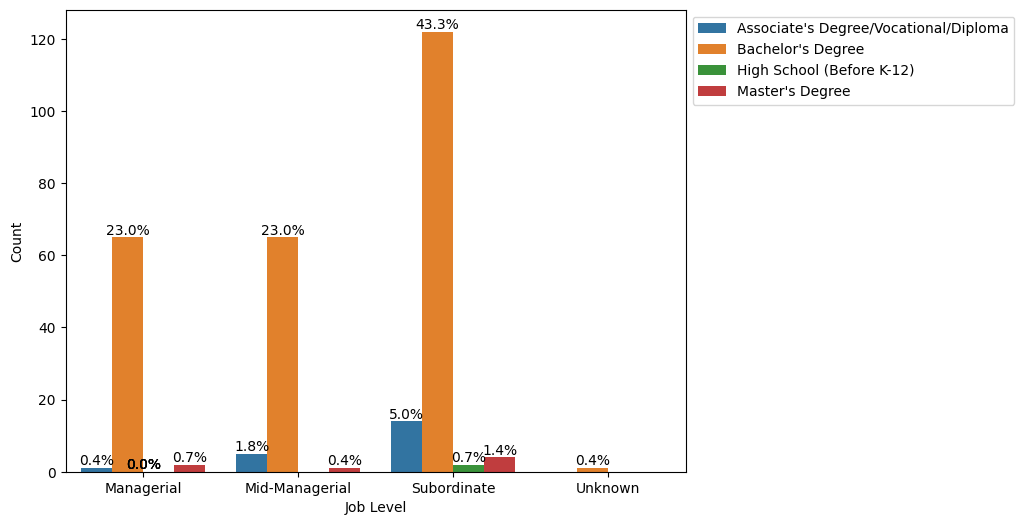

In [153]:
plot_educ_distrib("Job Level")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

**Education vs. Nature of Employment**

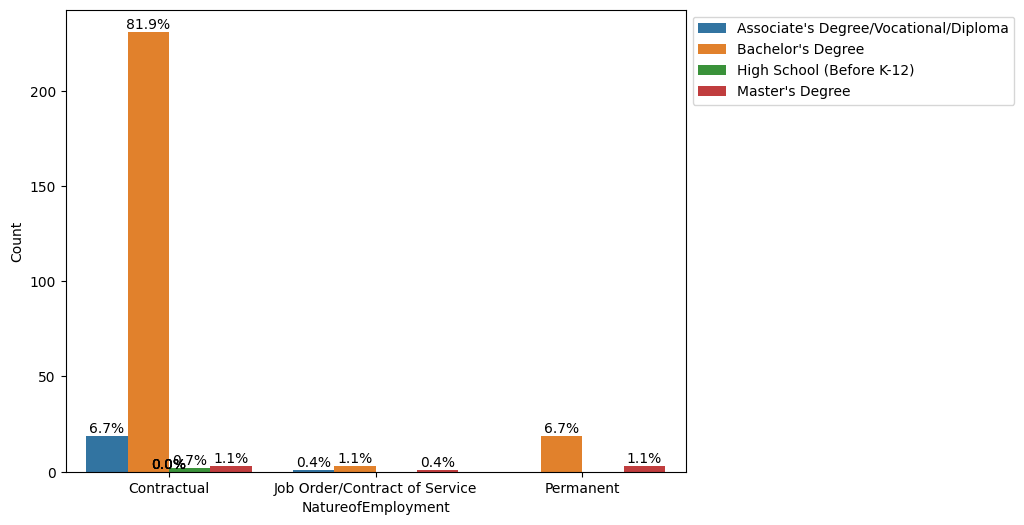

In [157]:
plot_educ_distrib("NatureofEmployment")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# **Multivariate Analysis**

<Axes: xlabel='YearsofService', ylabel='NatureofEmployment-HighestEducationalAttainment'>

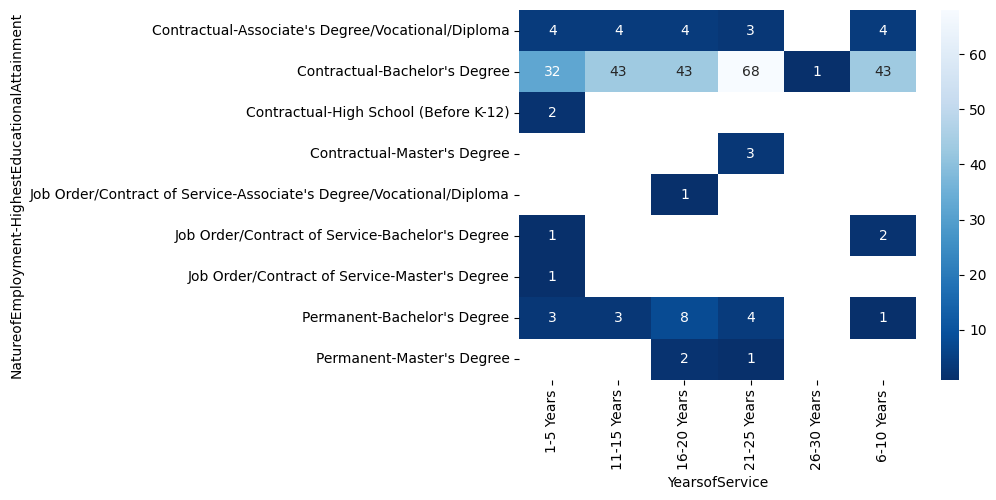

In [187]:
emp_educ_years = retention_df.groupby(["NatureofEmployment", "HighestEducationalAttainment", "YearsofService"]).count()["Occupation"].reset_index()
emp_educ_years.rename(columns={"Occupation":"Count"}, inplace=True)
emp_educ_years

multivar_emp_educ_years = emp_educ_years.pivot_table(values="Count",
                                                     index=["NatureofEmployment", "HighestEducationalAttainment"],
                                                     columns="YearsofService", aggfunc="sum")
sns.heatmap(multivar_emp_educ_years, cmap="Blues_r", annot=True)

<Axes: xlabel='YearsofService', ylabel='NatureofEmployment-Sex'>

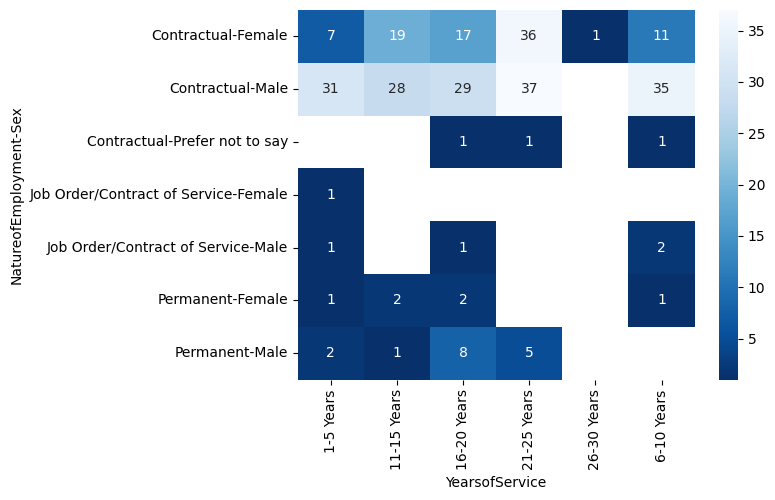

In [188]:
emp_sex_years = retention_df.groupby(["NatureofEmployment", "Sex", "YearsofService"]).count()["Occupation"].reset_index()
emp_sex_years.rename(columns={"Occupation":"Count"}, inplace=True)

multivar_emp_sex_years = emp_sex_years.pivot_table(values="Count",
                                                     index=["NatureofEmployment", "Sex"],
                                                     columns="YearsofService", aggfunc="sum")
sns.heatmap(multivar_emp_sex_years, cmap="Blues_r", annot=True)

# Insights
